In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import requests library
import requests

# Import API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5eda766634b940ba16fecbeedcef14bb


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | dingle
Processing Record 5 of Set 1 | arlit
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | labuhan
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | florence
Processing Record 13 of Set 1 | portobelo
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | meulaboh
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | skibbereen
Processing Record 19 of Set 1 | norilsk
Processing Record 20 of Set 1 | sioux lookout
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | n

Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | nyurba
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | oleksandrivka
Processing Record 45 of Set 4 | sharon
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | bor
Processing Record 48 of Set 4 | wanning
Processing Record 49 of Set 4 | banda aceh
Processing Record 50 of Set 4 | byumba
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | lakhdenpokhya
Processing Record 3 of Set 5 | iwanai
Processing Record 4 of Set 5 | mirnyy
Processing Record 5 of Set 5 | kargil
Processing Record 6 of Set 5 | dicamay
Processing Record 7 of Set 5 | aykhal
Processing Record 8 of Set 5 | buala
Processing Record 9 of Set 5 | bethel
Processing Record 10 of Set 5 | cherskiy
Processing Record 11 of Set 5 | dovolnoye
Processing Record 12 of Set 5 | zalantun
Processing Record 13 of Set 5 | yambio
Pro

Processing Record 34 of Set 8 | ambon
Processing Record 35 of Set 8 | semporna
Processing Record 36 of Set 8 | boende
Processing Record 37 of Set 8 | samusu
City not found. Skipping...
Processing Record 38 of Set 8 | tahta
Processing Record 39 of Set 8 | rafaela
Processing Record 40 of Set 8 | los llanos de aridane
Processing Record 41 of Set 8 | wa
City not found. Skipping...
Processing Record 42 of Set 8 | sorong
Processing Record 43 of Set 8 | dordrecht
Processing Record 44 of Set 8 | pevek
Processing Record 45 of Set 8 | mount gambier
Processing Record 46 of Set 8 | beira
Processing Record 47 of Set 8 | namikupa
Processing Record 48 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 49 of Set 8 | lata
Processing Record 50 of Set 8 | bubaque
Processing Record 1 of Set 9 | alice springs
Processing Record 2 of Set 9 | umm durman
City not found. Skipping...
Processing Record 3 of Set 9 | benguela
Processing Record 4 of Set 9 | sisimiut
Processing Record 5 of Set 

Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | biltine
Processing Record 23 of Set 12 | camana
Processing Record 24 of Set 12 | oranjemund
Processing Record 25 of Set 12 | anadyr
Processing Record 26 of Set 12 | niquelandia
Processing Record 27 of Set 12 | caledon
Processing Record 28 of Set 12 | mackay
Processing Record 29 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 30 of Set 12 | turbat
Processing Record 31 of Set 12 | ambunti
Processing Record 32 of Set 12 | lubango
Processing Record 33 of Set 12 | dvinskoy
Processing Record 34 of Set 12 | fujin
Processing Record 35 of Set 12 | gravdal
Processing Record 36 of Set 12 | aquiraz
Processing Record 37 of Set 12 | uige
Processing Record 38 of Set 12 | kautokeino
Processing Record 39 of Set 12 | fernley
Processing Record 40 of Set 12 | harper
Processing Record 41 of Set 12 | galle
Processing Record 42 of Set 12 | kargopol
Processing Record 43 of Set 12 | passos
Processing Record 44 of Set 1

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,37.54,71,83,9.51,GL,2021-04-08 17:29:08
1,Te Anau,-45.4167,167.7167,44.24,92,6,2.17,NZ,2021-04-08 17:29:08
2,Dingle,10.9995,122.6711,75.56,80,100,4.90,PH,2021-04-08 17:29:09
3,Arlit,18.7369,7.3853,100.27,4,93,10.85,NE,2021-04-08 17:29:09
4,Arraial Do Cabo,-22.9661,-42.0278,77.00,73,75,11.50,BR,2021-04-08 17:29:09
5,Rikitea,-23.1203,-134.9692,76.28,61,47,0.83,PF,2021-04-08 17:29:10
6,Port Alfred,-33.5906,26.8910,67.89,87,29,6.17,ZA,2021-04-08 17:29:10
7,Leningradskiy,69.3833,178.4167,-24.54,96,19,5.73,RU,2021-04-08 17:29:10
8,Labuhan,-6.8844,112.2051,79.79,85,98,10.94,ID,2021-04-08 17:29:11
9,Saint-Philippe,-21.3585,55.7679,80.60,74,40,4.61,RE,2021-04-08 17:29:11


In [9]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2021-04-08 17:29:08,60.1432,-45.2371,37.54,71,83,9.51
1,Te Anau,NZ,2021-04-08 17:29:08,-45.4167,167.7167,44.24,92,6,2.17
2,Dingle,PH,2021-04-08 17:29:09,10.9995,122.6711,75.56,80,100,4.90
3,Arlit,NE,2021-04-08 17:29:09,18.7369,7.3853,100.27,4,93,10.85
4,Arraial Do Cabo,BR,2021-04-08 17:29:09,-22.9661,-42.0278,77.00,73,75,11.50
5,Rikitea,PF,2021-04-08 17:29:10,-23.1203,-134.9692,76.28,61,47,0.83
6,Port Alfred,ZA,2021-04-08 17:29:10,-33.5906,26.8910,67.89,87,29,6.17
7,Leningradskiy,RU,2021-04-08 17:29:10,69.3833,178.4167,-24.54,96,19,5.73
8,Labuhan,ID,2021-04-08 17:29:11,-6.8844,112.2051,79.79,85,98,10.94
9,Saint-Philippe,RE,2021-04-08 17:29:11,-21.3585,55.7679,80.60,74,40,4.61


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Plotting the data

In [26]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

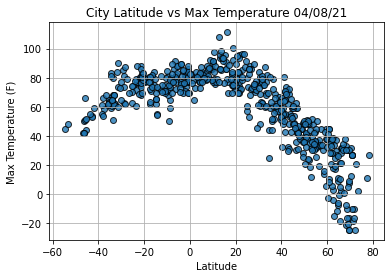

In [27]:
# Import the time module
import time

# Build the scatter plot for latitude vs max temp.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# show the plot.
plt.show()

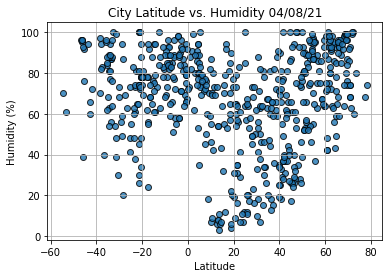

In [28]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure. 
plt.savefig("weather_data/Fig2.png")
# Show the plot
plt.show()

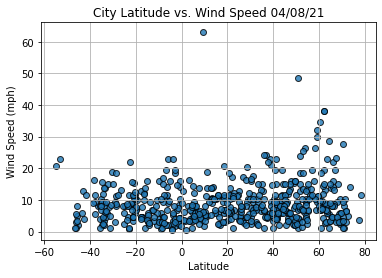

In [29]:
# Build the scatter plot for latitude vs wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure. 
plt.savefig("weather_data/Fig3.png")
# Show the plot
plt.show()

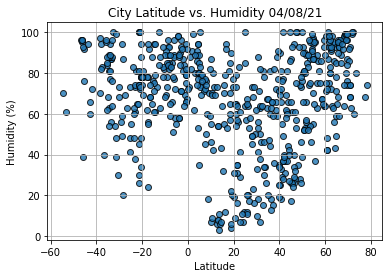

In [30]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure. 
plt.savefig("weather_data/Fig4.png")
# Show the plot
plt.show()